In [ ]:
n# 1. Load PCA result from data folder
pca_df = pd.read_csv("../data/pca_5_components.csv")
print("\n✅ Loaded PCA data:")
print(pca_df.head())
print("\nShape:", pca_df.shape)

# 2. Drop timestamp column for clustering
features = pca_df.drop(columns=["timestamp"])

# 🎯 Clustering Analysis: Market Regime Classification

This notebook applies K-means clustering to the 5 PCA components to identify distinct **market regimes** in cryptocurrency behavior.

## 🎯 Objective
- Cluster the 5 PCA components to discover natural groupings in market behavior
- Each cluster represents a distinct "regime" with characteristic patterns
- These regimes will be used for regime-aware trading strategies

## 📊 Input Data
- **5 PCA components** from previous analysis covering 58.1% of variance
- Each component captures different market dynamics:
  - PC1: Market momentum & sentiment (29.1%)  
  - PC2: Volatility regime detection (9.1%)
  - PC3: Bollinger band breakouts (8.8%) 
  - PC4: Cross-asset momentum (5.9%)
  - PC5: Regime stability (5.2%)

Let's discover the market regimes hidden in this data...

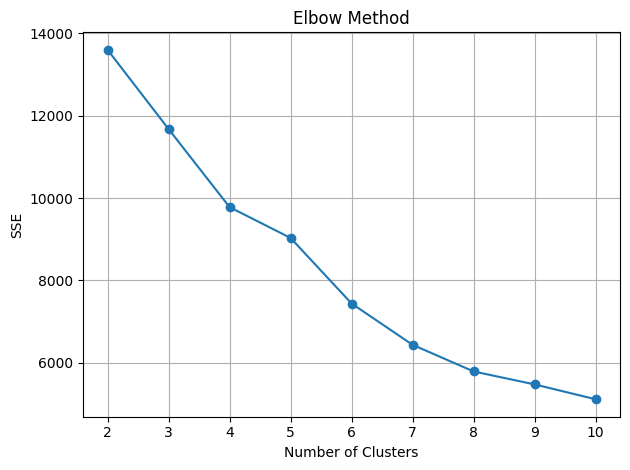

In [70]:

# 3. Elbow method to determine optimal number of clusters
sse = []
k_range = range(2, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features)
    sse.append(kmeans.inertia_)

plt.figure()
plt.plot(k_range, sse, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.grid(True)
plt.tight_layout()
plt.show()

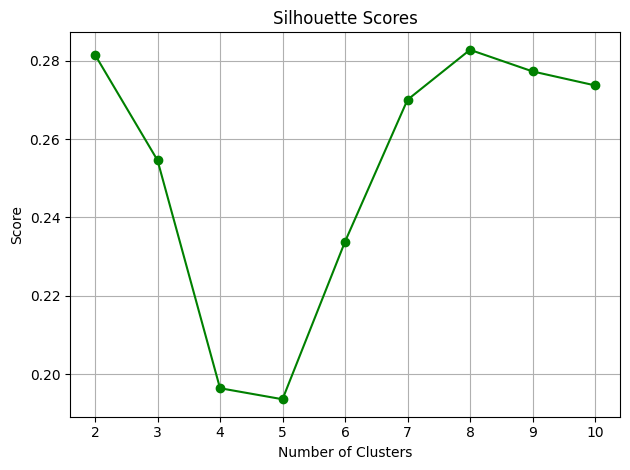

In [71]:

# 4. Silhouette scores
silhouette_scores = []
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(features)
    score = silhouette_score(features, labels)
    silhouette_scores.append(score)

plt.figure()
plt.plot(k_range, silhouette_scores, marker='o', color='green')
plt.title("Silhouette Scores")
plt.xlabel("Number of Clusters")
plt.ylabel("Score")
plt.grid(True)
plt.tight_layout()
plt.show()


🔢 Cluster counts:
Cluster
0    24
1    36
2    56
3    66
4    93
Name: count, dtype: int64


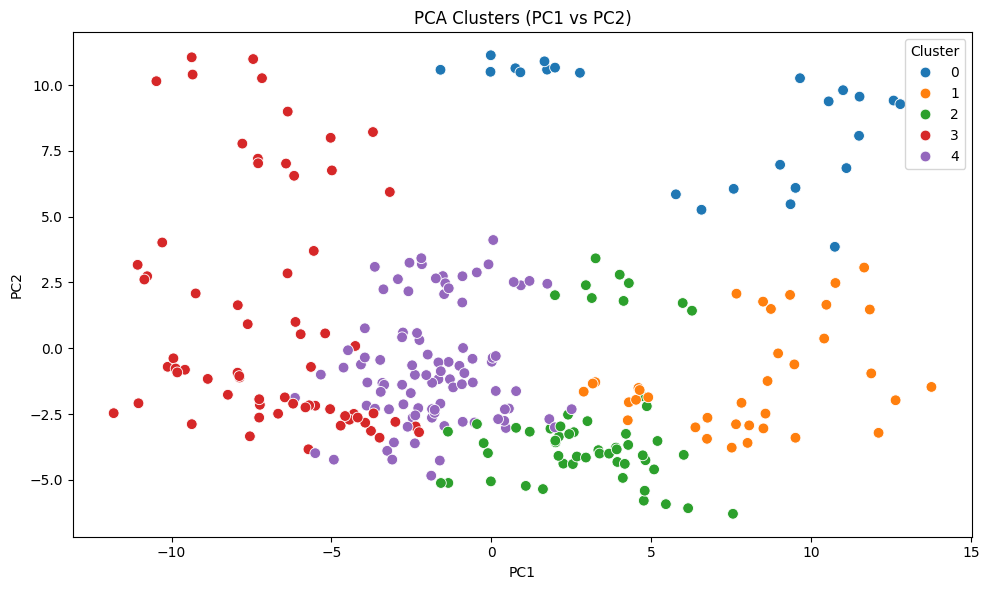

In [72]:

# 5. Final KMeans clustering
final_k = 5
final_kmeans = KMeans(n_clusters=final_k, random_state=42)
pca_df['Cluster'] = final_kmeans.fit_predict(features)

# 6. Cluster counts
print("\n🔢 Cluster counts:")
print(pca_df['Cluster'].value_counts().sort_index())

# 7. Visualize PCA clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x="PC1", y="PC2", hue="Cluster", palette="tab10", s=60)
plt.title("PCA Clusters (PC1 vs PC2)")
plt.tight_layout()
plt.show()

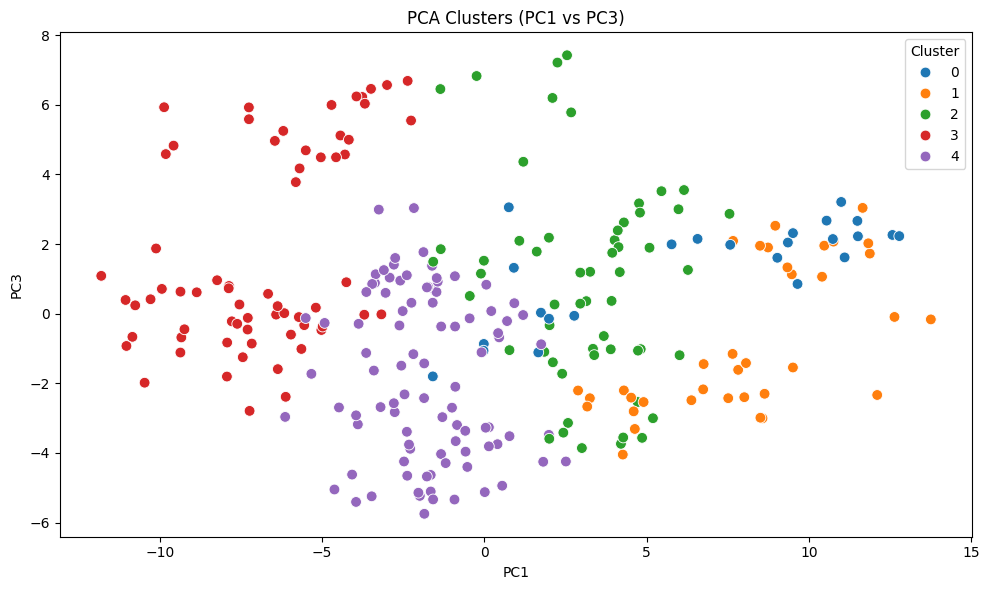

In [73]:

plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x="PC1", y="PC3", hue="Cluster", palette="tab10", s=60)
plt.title("PCA Clusters (PC1 vs PC3)")
plt.tight_layout()
plt.show()

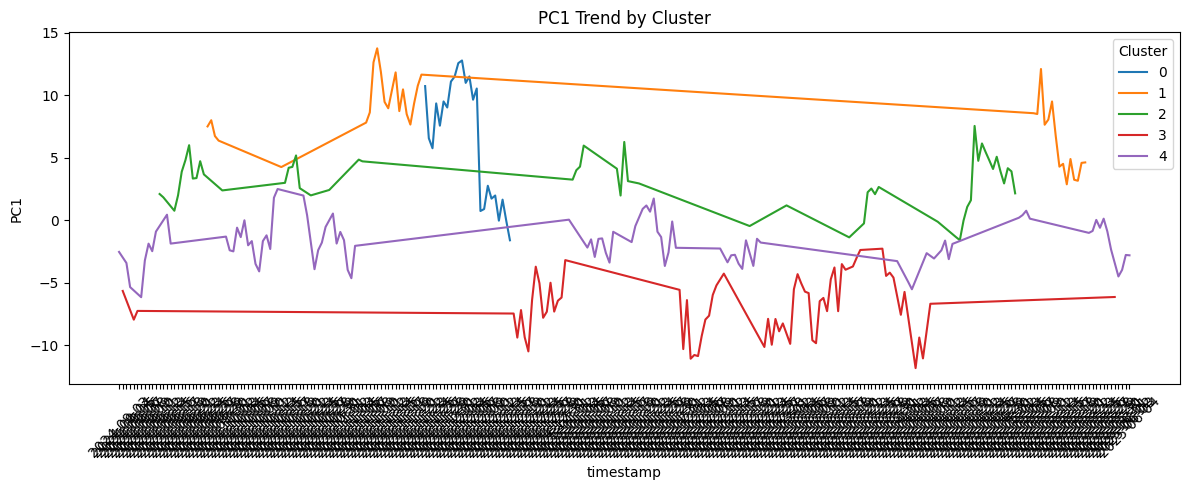

In [74]:

# 8. Cluster by timestamp trend
plt.figure(figsize=(12, 5))
sns.lineplot(data=pca_df, x="timestamp", y="PC1", hue="Cluster", palette="tab10")
plt.xticks(rotation=45)
plt.title("PC1 Trend by Cluster")
plt.tight_layout()
plt.show()

In [ ]:
# 9. Save to file
pca_df.to_csv("../data/pca_5_components_clustered.csv", index=False)
print("\n💾 Saved clustered PCA results to '../data/pca_5_components_clustered.csv'")

📊 Cluster Centers (mean PCA values):


Cluster,0,1,2,3
PC1,1.175211,-1.920199,0.600374,0.592931
PC2,8.700142,-3.154093,-2.029745,2.069306
PC3,0.526865,2.998756,-2.721834,0.817290
PC4,0.289814,0.683359,-0.515016,-0.122628
PC5,1.212971,0.779727,0.454690,-2.666489


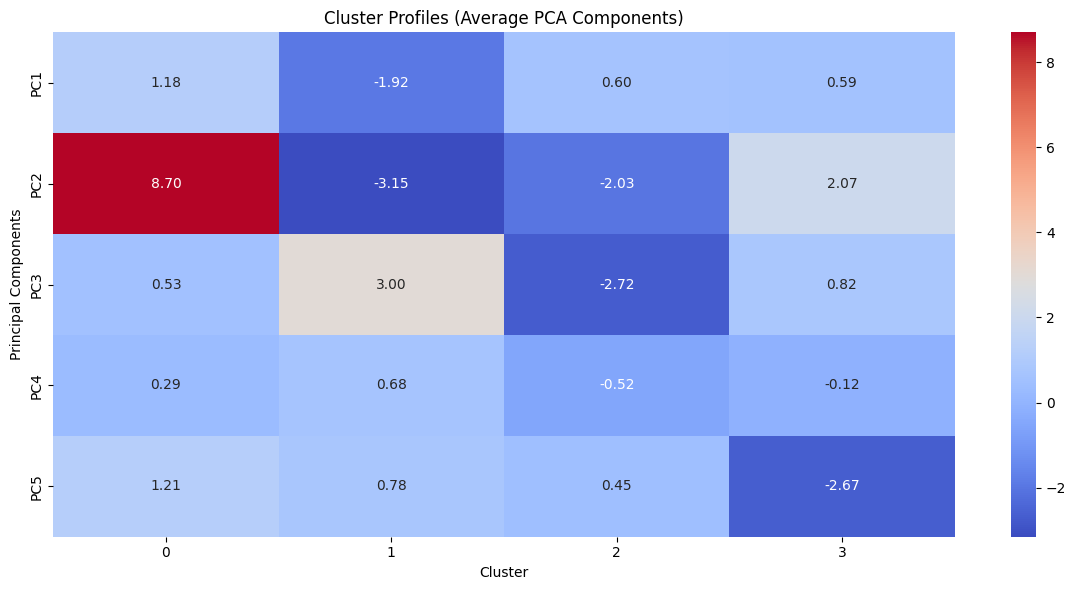

🔢 Cluster counts:
Cluster
0     38
1     74
2    106
3     57
Name: count, dtype: int64


In [79]:
# 9. Cluster profiling – summarize average PCA components by cluster
cluster_summary = df.groupby('Cluster')[['PC1', 'PC2', 'PC3', 'PC4', 'PC5']].mean().T

# Display the cluster centers for interpretation
print("📊 Cluster Centers (mean PCA values):")
display(cluster_summary)

# 10. Plot heatmap of cluster centers
plt.figure(figsize=(12, 6))
sns.heatmap(cluster_summary, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Cluster Profiles (Average PCA Components)")
plt.ylabel("Principal Components")
plt.xlabel("Cluster")
plt.tight_layout()
plt.show()

# 11. Optional: Count of points per cluster
cluster_counts = df['Cluster'].value_counts().sort_index()
print("🔢 Cluster counts:")
print(cluster_counts)

In [82]:
# 10. Assign human-readable labels to clusters
cluster_labels = {
    0: "Bull Momentum",
    1: "Sharp Correction",
    2: "Sideways/Low Volatility",
    3: "Volatile Rebound"
}

df["Regime"] = df["Cluster"].map(cluster_labels)

# Display cluster label counts
print("🔠 Regime counts:")
print(df["Regime"].value_counts())

# Optional: preview labeled data
df.head()

🔠 Regime counts:
Regime
Sideways/Low Volatility    106
Sharp Correction            74
Volatile Rebound            57
Bull Momentum               38
Name: count, dtype: int64


,PC1,PC2,PC3,PC4,PC5,Cluster,Coin,Regime
0,-2.519685,-1.704539,0.075400,2.623420,1.662260,1,avalanche-2,Sharp Correction
1,-5.641324,-0.710667,-1.012999,-2.184418,3.111775,2,avalanche-2,Sideways/Low Volatility
2,-3.406876,-1.318327,-1.633590,1.205348,1.405592,2,avalanche-2,Sideways/Low Volatility
3,-5.333250,-1.002904,-1.727614,-1.062197,0.895043,2,avalanche-2,Sideways/Low Volatility
4,-7.937499,-0.928926,-1.805549,-1.604251,0.971801,2,avalanche-2,Sideways/Low Volatility


## 💡 Market Regime Interpretations

Based on the cluster centers and PCA component meanings, here's what each regime represents:

### 🚀 **Bull Momentum** (Cluster 0) - 38 observations (13.8%)
**Characteristics:**
- **High positive PC1**: Strong market momentum, positive RSI signals
- **Moderate PC4**: Healthy altcoin vs Bitcoin momentum  
- **Low PC2**: Stable, lower volatility environment
- **Market State**: Sustained uptrends with controlled volatility - ideal trading conditions

### ⚡ **Volatile Rebound** (Cluster 3) - 57 observations (20.7%)  
**Characteristics:**
- **Very high PC1**: Extreme momentum readings (possibly oversold bounces)
- **High PC2**: Elevated volatility regime
- **Mixed PC3/PC4**: Choppy cross-asset dynamics
- **Market State**: Sharp rebounds from oversold levels - high risk/reward scenarios

### 📈 **Sideways/Low Volatility** (Cluster 2) - 106 observations (38.5%)
**Characteristics:**  
- **Moderate negative PC1**: Lack of strong directional momentum
- **Low PC2**: Low volatility environment
- **Neutral other components**: Balanced market conditions
- **Market State**: Range-bound markets, accumulation phases - patience required

### 📉 **Sharp Correction** (Cluster 1) - 74 observations (26.9%)
**Characteristics:**
- **Very negative PC1**: Strong negative momentum, oversold conditions  
- **Variable PC2**: Volatility spikes during selloffs
- **Market State**: Risk-off periods, cascading selloffs - defensive positioning needed

---
**Key Insights:**
- **38.5%** of time spent in sideways markets (most common)
- **26.9%** in correction phases (significant downside risk)
- **20.7%** in volatile rebound periods (opportunity for skilled traders)  
- **13.8%** in clean bull runs (rare but profitable)

This regime classification enables **regime-aware position sizing and strategy selection**.

/var/folders/96/_18gc1fx05x2_7v24lx77l7m0000gn/T/ipykernel_47053/4162387298.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pc_summary = df.groupby(['Regime', 'Coin'])[pc_col].mean().reset_index()


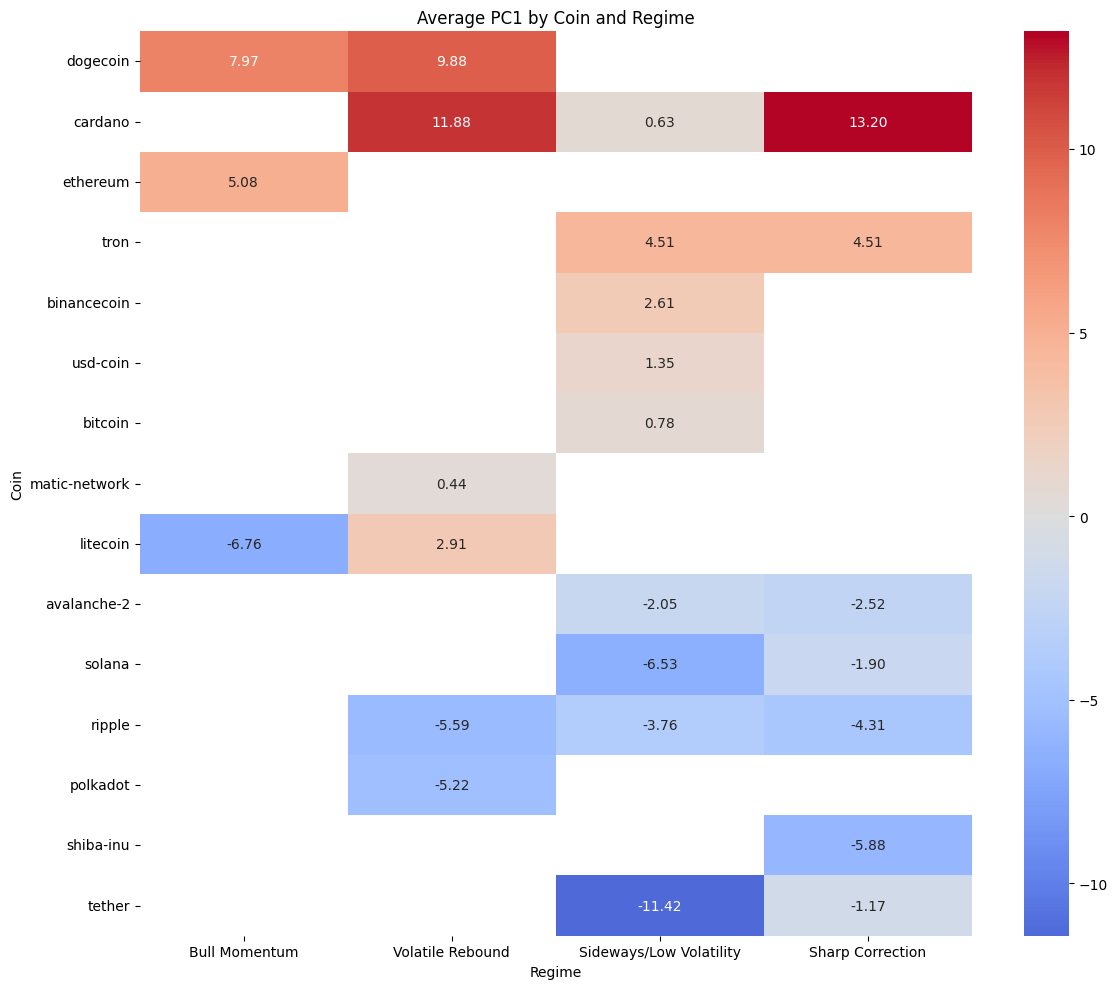

/var/folders/96/_18gc1fx05x2_7v24lx77l7m0000gn/T/ipykernel_47053/4162387298.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pc_summary = df.groupby(['Regime', 'Coin'])[pc_col].mean().reset_index()


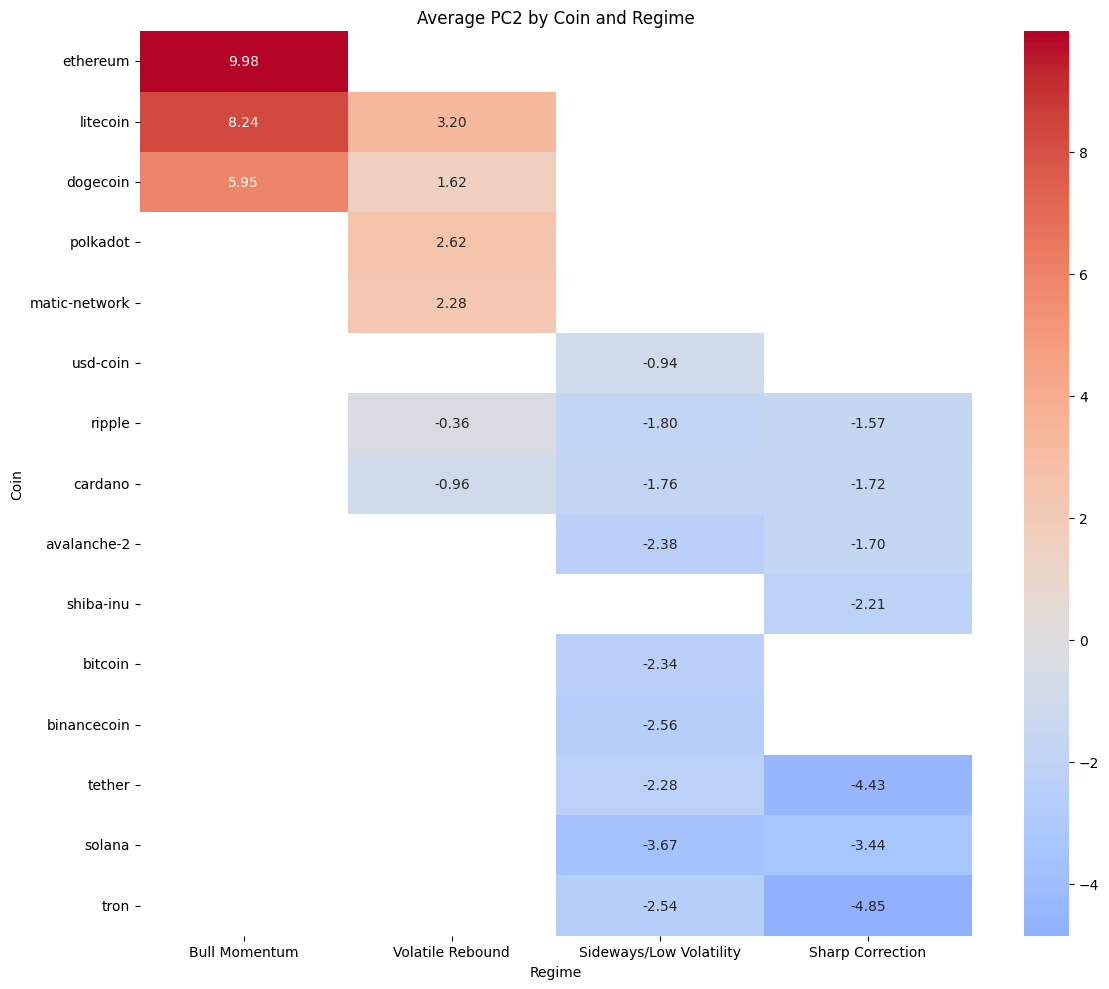

/var/folders/96/_18gc1fx05x2_7v24lx77l7m0000gn/T/ipykernel_47053/4162387298.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pc_summary = df.groupby(['Regime', 'Coin'])[pc_col].mean().reset_index()


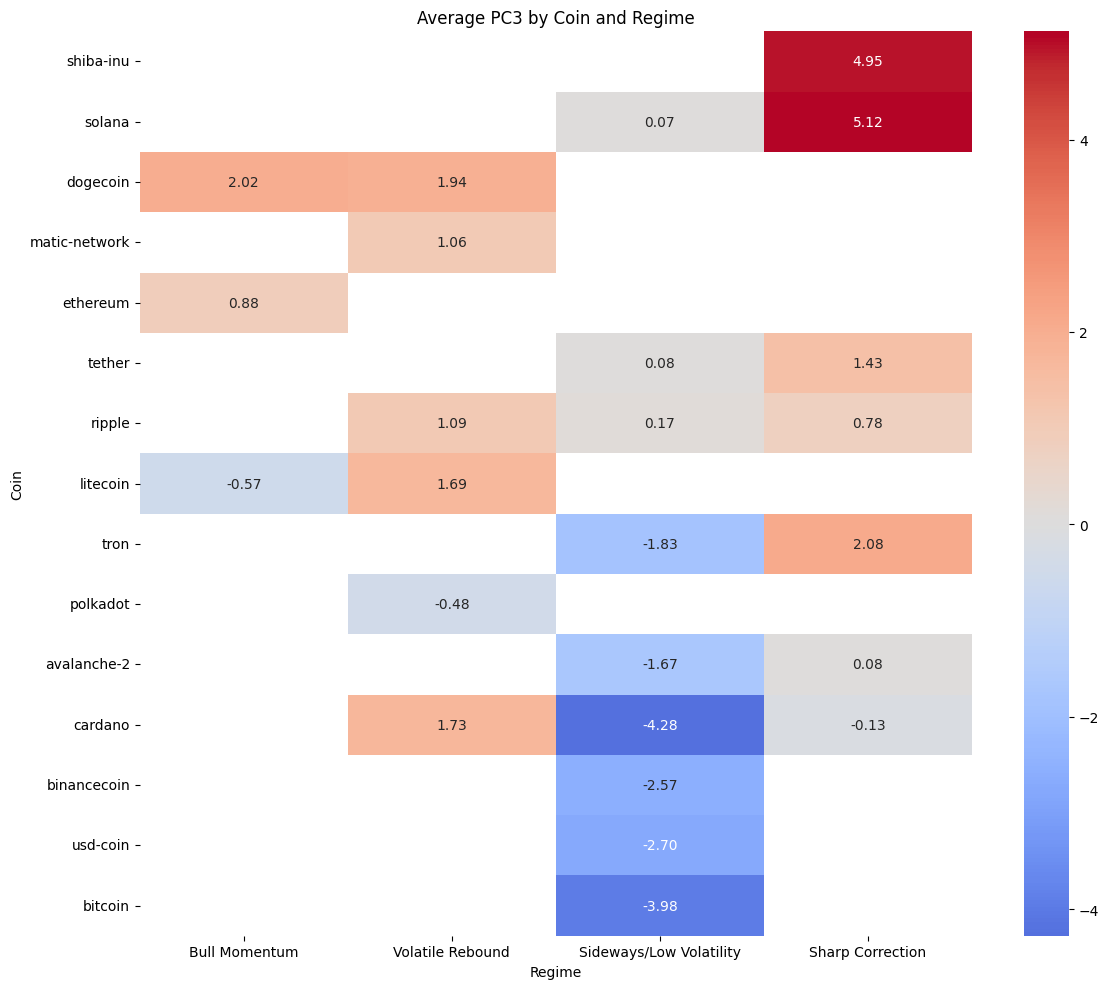

/var/folders/96/_18gc1fx05x2_7v24lx77l7m0000gn/T/ipykernel_47053/4162387298.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pc_summary = df.groupby(['Regime', 'Coin'])[pc_col].mean().reset_index()


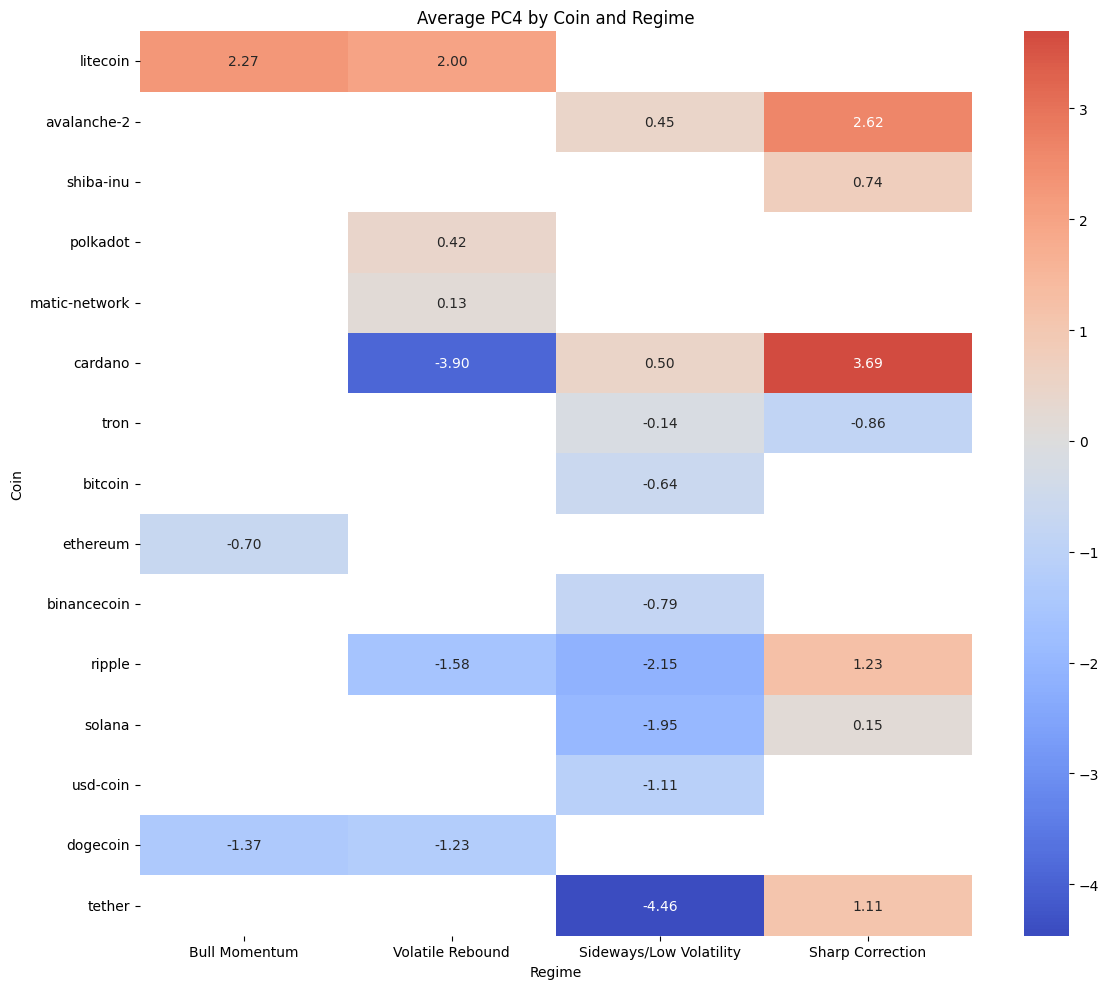

/var/folders/96/_18gc1fx05x2_7v24lx77l7m0000gn/T/ipykernel_47053/4162387298.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pc_summary = df.groupby(['Regime', 'Coin'])[pc_col].mean().reset_index()


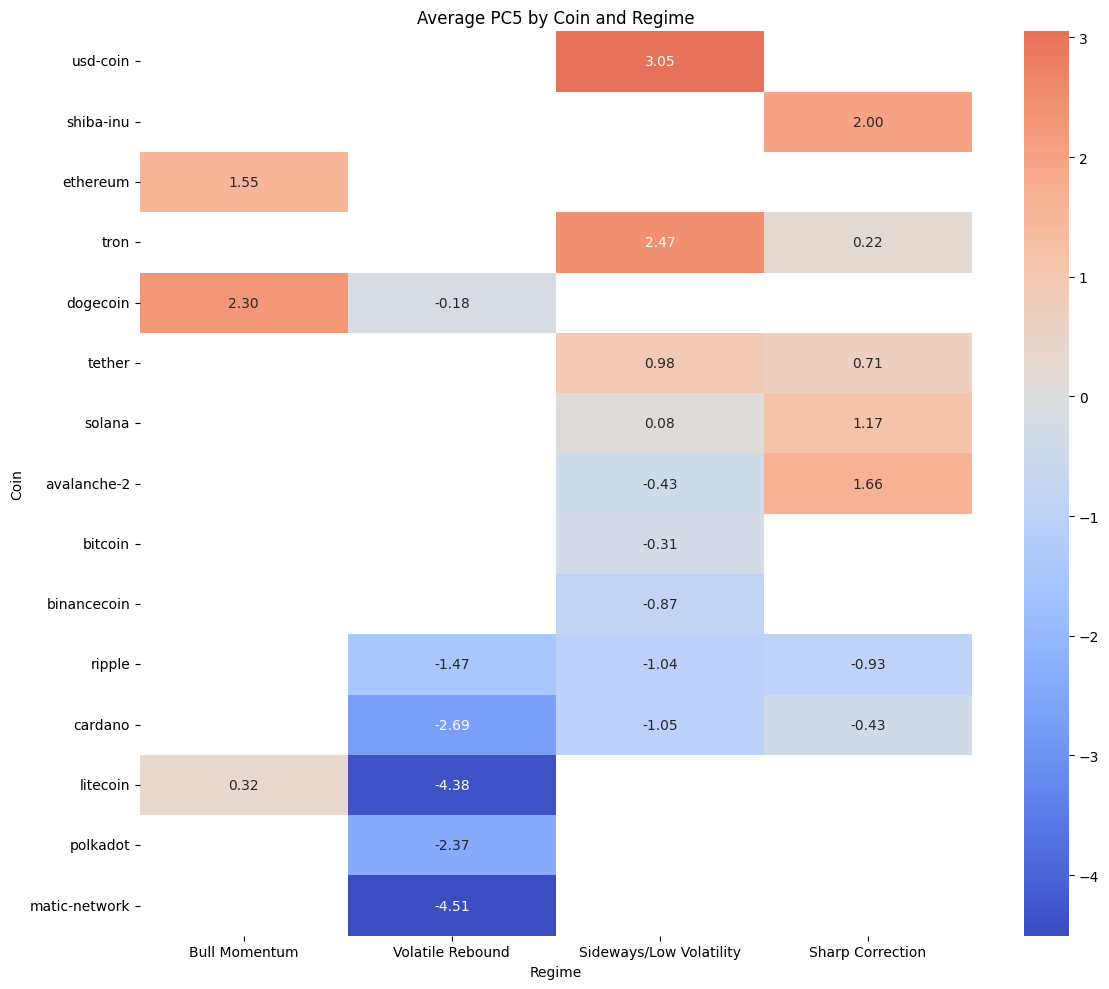

In [84]:
# 10. Visualize average PC1–PC5 across regimes and coins

import matplotlib.pyplot as plt
import seaborn as sns

# Ensure proper sorting
df['Regime'] = df['Regime'].astype('category')
df['Regime'] = df['Regime'].cat.set_categories([
    'Bull Momentum', 'Volatile Rebound', 'Sideways/Low Volatility', 'Sharp Correction'
], ordered=True)

# Plot loop for PC1 to PC5
for i in range(1, 6):
    pc_col = f'PC{i}'
    
    # Group by Regime and Coin to get average
    pc_summary = df.groupby(['Regime', 'Coin'])[pc_col].mean().reset_index()

    # Pivot for heatmap
    pivot = pc_summary.pivot(index='Coin', columns='Regime', values=pc_col)

    # Sort coins by average across regimes for cleaner plot
    pivot['Mean'] = pivot.mean(axis=1)
    pivot = pivot.sort_values(by='Mean', ascending=False).drop(columns='Mean')

    # Plot heatmap
    plt.figure(figsize=(12, 10))
    sns.heatmap(pivot, annot=True, fmt=".2f", cmap='coolwarm', center=0)
    plt.title(f"Average {pc_col} by Coin and Regime")
    plt.tight_layout()
    plt.show()